In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model, neighbors, cross_validation, grid_search
import datetime as datetime
from pylab import plotfile, show, gca
import matplotlib.cbook as cbook
import pylab as pl
%matplotlib inline

plt.style.use('ggplot')

/Users/RyanReiger/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
df = pd.read_csv('/Users/RyanReiger/GA_Stuff/Final_Project/Project_DB_Update.csv')

In [3]:
df.corr()

,Close_Price,High_Price,Low_Price,NAV,Premium_Discount,Price_Change,Spread_$,Spread_bps,Volume,Dollar_Volume,...,NYSE_VOLUME,NYSE_Dollar_Volume,NYSE_Intraday_Volatility,NYSE_Daily_Volatility,NYSE_VWAP,NYSE_Spread,NYSE_%Spread,NYSE_Bid_Size,NYSE_Ask_Size,NYSE_Average_Size
Close_Price,1.000000,0.999379,0.999399,0.999576,-0.065165,0.016821,-0.058598,-0.100818,0.159530,0.288624,...,0.169834,0.389228,0.224640,-0.091024,0.216196,-0.015908,-0.083900,0.301611,0.313329,0.310049
High_Price,0.999379,1.000000,0.998911,0.999528,-0.084208,0.006530,-0.059173,-0.101462,0.166032,0.295819,...,0.179094,0.400161,0.241571,-0.079241,0.219961,-0.016328,-0.084587,0.297962,0.308910,0.305993
Low_Price,0.999399,0.998911,1.000000,0.999459,-0.081323,0.010293,-0.058671,-0.101050,0.153387,0.281884,...,0.160688,0.378538,0.208310,-0.101260,0.211801,-0.016067,-0.083763,0.305856,0.317331,0.314206
NAV,0.999576,0.999528,0.999459,1.000000,-0.093006,0.007580,-0.059909,-0.102447,0.164399,0.293962,...,0.174105,0.393602,0.225714,-0.090175,0.215258,-0.016133,-0.084385,0.305972,0.316356,0.313790
Premium_Discount,-0.065165,-0.084208,-0.081323,-0.093006,1.000000,0.327670,0.067927,0.082558,-0.164723,-0.183933,...,-0.148020,-0.165739,-0.054208,-0.014138,-0.004223,0.009293,0.024467,-0.160802,-0.120720,-0.142417
Price_Change,0.016821,0.006530,0.010293,0.007580,0.327670,1.000000,0.016821,0.030567,-0.013304,-0.012734,...,-0.014514,-0.017873,-0.030196,-0.422301,0.002540,0.006414,0.005495,0.013257,0.025824,0.019550
Spread_$,-0.058598,-0.059173,-0.058671,-0.059909,0.067927,0.016821,1.000000,0.861683,-0.046262,-0.047175,...,-0.056848,-0.058048,-0.036555,-0.004606,-0.058497,0.053336,0.064755,-0.058405,-0.060843,-0.060336
Spread_bps,-0.100818,-0.101462,-0.101050,-0.102447,0.082558,0.030567,0.861683,1.000000,-0.078199,-0.079778,...,-0.095976,-0.098087,-0.044878,0.020286,-0.100504,0.134970,0.150220,-0.098803,-0.102762,-0.101987
Volume,0.159530,0.166032,0.153387,0.164399,-0.164723,-0.013304,-0.046262,-0.078199,1.000000,0.919200,...,0.733494,0.672251,0.014722,0.173021,-0.212354,-0.015183,-0.049151,0.457790,0.451725,0.458858
Dollar_Volume,0.288624,0.295819,0.281884,0.293962,-0.183933,-0.012734,-0.047175,-0.079778,0.919200,1.000000,...,0.640721,0.711174,0.180544,0.137449,-0.042265,-0.015775,-0.057190,0.415838,0.406901,0.415115


In [4]:
df.describe()

,Close_Price,High_Price,Low_Price,NAV,Premium_Discount,Price_Change,Spread_$,Spread_bps,Volume,Dollar_Volume,...,NYSE_VOLUME,NYSE_Dollar_Volume,NYSE_Intraday_Volatility,NYSE_Daily_Volatility,NYSE_VWAP,NYSE_Spread,NYSE_%Spread,NYSE_Bid_Size,NYSE_Ask_Size,NYSE_Average_Size
count,7870.000000,7870.000000,7870.000000,7870.000000,7866.000000,7868.000000,3894.00000,3894.000000,7.870000e+03,7.870000e+03,...,7.864000e+03,7.864000e+03,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000,7864.000000
mean,36.977778,37.236035,36.686771,36.916093,0.001842,-0.000787,0.08975,0.126962,2.045635e+07,8.888975e+08,...,3.427741e+07,1.495341e+09,0.192681,0.012905,55.857471,0.422915,0.000526,56183.675738,56753.006994,56487.427136
std,9.257680,9.293889,9.212517,9.256117,0.007767,0.039061,1.27468,0.966280,2.973089e+07,1.171977e+09,...,3.847447e+07,1.433314e+09,0.241741,0.021291,40.251457,17.830030,0.003737,68616.123423,66070.839728,66778.186700
min,17.110000,17.220000,16.772000,16.903100,-0.063204,-2.115130,0.01000,0.019900,6.925000e+03,3.332938e+05,...,6.925000e+03,3.332920e+05,0.003000,0.000000,16.970000,0.010000,0.000100,116.000000,365.000000,565.000000
25%,27.360000,27.551000,27.132500,27.226625,-0.001990,-0.008474,0.01010,0.024100,3.986085e+05,1.619366e+07,...,8.569835e+05,4.870331e+07,0.064000,0.004000,32.527500,0.010000,0.000200,1644.750000,2517.000000,2195.250000
50%,39.357500,39.630000,39.060000,39.330000,0.002155,0.000589,0.01030,0.026300,6.605724e+06,3.469055e+08,...,2.046233e+07,1.476872e+09,0.111000,0.009000,41.595000,0.010000,0.000300,9591.000000,19039.000000,14354.000000
75%,43.730000,43.954575,43.442700,43.630000,0.006000,0.008689,0.02030,0.072400,2.955534e+07,1.508246e+09,...,5.889362e+07,2.461577e+09,0.207000,0.016000,50.790000,0.020000,0.000600,102838.250000,102757.750000,104221.500000
max,58.640000,58.925000,57.500000,58.310000,0.120749,0.203795,42.16490,33.692300,2.486881e+08,8.633872e+09,...,2.912749e+08,8.942428e+09,2.656000,0.678000,221.650000,798.380000,0.167900,340389.000000,347646.000000,280819.000000


### Initial Transformation of Varables

In [5]:
#renaming columns
df = df.rename(columns={'NYSE_%Spread': 'NYSE_Spread_bps'})
df = df.rename(columns={'NYSE_%Range': 'NYSE_pct_range'})
df = df.rename(columns={'NYSE_%Spread': 'NYSE_Spread_bps'})
df = df.rename(columns={'Spread_$':'Spread_Dollar'})
df = df.rename(columns={'NAV ': 'NAV'})
#formatting Date and Fund Inception columns
df.Date = pd.to_datetime(df.Date)
df.Inception = pd.to_datetime(df.Inception)
#Transforming Varables
df['Ask_Val'] = df['NYSE_Ask_Size'] * df['NYSE_VWAP']
df['Bid_Val'] = df['NYSE_Bid_Size'] * df['NYSE_VWAP']
df['Vintage'] = df.Date - df.Inception
df['AUM'] = df.Shares_Outstanding * df.NAV * 1000
#Formatting Vintage Varable
df.Vintage = df.Vintage.astype('timedelta64[D]')
df.ix[df.Vintage == 0, 'Vintage'] = 1
#Creating my dependent variable
df['Asset_Velocity'] = df.AUM / (df.Vintage * 1.0)
#Dropping Variables
df = df.drop('Spread_bps', 1)
df = df.drop('Spread_Dollar', 1)
#Setting Date as index
##df.set_index('Date', inplace = True)
#df['Year'] = df.Date.year
#df['Month'] = df.Date.month


### Cleaning Data Set

In [6]:
df.isnull().sum()

Fund                         0
Date                         0
Close_Price                  0
High_Price                   0
Low_Price                    0
NAV                          0
Premium_Discount             4
Price_Change                 2
Volume                       0
Dollar_Volume                0
Fund_Flow                   19
Shares_Outstanding           7
Inception                    0
NYSE_MKT_SHR                 6
NYSE_VOLUME                  6
NYSE_Dollar_Volume           6
NYSE_Intraday_Volatility     6
NYSE_Daily_Volatility        6
NYSE_Close                   6
NYSE_VWAP                    6
NYSE_Range                   6
NYSE_pct_range               6
NYSE_Spread                  6
NYSE_Spread_bps              6
NYSE_Bid_Size                6
NYSE_Ask_Size                6
NYSE_Average_Size            6
Ask_Val                      6
Bid_Val                      6
Vintage                      0
AUM                          7
Asset_Velocity               7
dtype: i

In [7]:
df.dropna(subset=['NAV'], inplace=True)
df.dropna(subset=['Asset_Velocity'], inplace=True)
df.Fund_Flow = df.Fund_Flow.fillna(0)
df.dropna(subset=['NYSE_Close'], inplace=True)

### Dropping Spread Outliers

In [8]:
df[(df.Fund == 'EEM')].NYSE_Spread_bps.count()

2766

In [9]:
#EEM
eem_outlier_index = df[(df.Fund == 'EEM') & (df.NYSE_Spread_bps == df[(df.Fund == 'EEM')].NYSE_Spread_bps.max()) ].index
df = df.drop(eem_outlier_index, axis=0)
df.NYSE_Spread_bps[df.Fund == 'EEM'].max()

0.16240001

In [10]:
eem_outlier_index = df[(df.Fund == 'EEM') & (df.NYSE_Spread_bps == df[(df.Fund == 'EEM')].NYSE_Spread_bps.max()) ].index
df = df.drop(eem_outlier_index, axis=0)
df.NYSE_Spread_bps[df.Fund == 'EEM'].max()

eem_outlier_index = df[(df.Fund == 'EEM') & (df.NYSE_Spread_bps == df[(df.Fund == 'EEM')].NYSE_Spread_bps.max()) ].index
df = df.drop(eem_outlier_index, axis=0)
df.NYSE_Spread_bps[df.Fund == 'EEM'].max()

eem_outlier_index = df[(df.Fund == 'EEM') & (df.NYSE_Spread_bps == df[(df.Fund == 'EEM')].NYSE_Spread_bps.max()) ].index
df = df.drop(eem_outlier_index, axis=0)
df.NYSE_Spread_bps[df.Fund == 'EEM'].max()

0.0011

In [11]:
df[(df.Fund == 'EEM') & (df.NYSE_Spread_bps > .0)].NYSE_Spread_bps.count()

2762

In [12]:
#VWO
vwo_outlier_index = df[(df.Fund == 'VWO') & (df.NYSE_Spread_bps == df[(df.Fund == 'VWO')].NYSE_Spread_bps.max()) ].index
df = df.drop(vwo_outlier_index, axis=0)
df.NYSE_Spread_bps[df.Fund == 'VWO'].max()

vwo_outlier_index = df[(df.Fund == 'VWO') & (df.NYSE_Spread_bps == df[(df.Fund == 'VWO')].NYSE_Spread_bps.max()) ].index
df = df.drop(vwo_outlier_index, axis=0)
df.NYSE_Spread_bps[df.Fund == 'VWO'].max()

vwo_outlier_index = df[(df.Fund == 'VWO') & (df.NYSE_Spread_bps == df[(df.Fund == 'VWO')].NYSE_Spread_bps.max()) ].index
df = df.drop(vwo_outlier_index, axis=0)
df.NYSE_Spread_bps[df.Fund == 'VWO'].max()

0.0012

In [13]:
df.isnull().sum()

Fund                        0
Date                        0
Close_Price                 0
High_Price                  0
Low_Price                   0
NAV                         0
Premium_Discount            4
Price_Change                2
Volume                      0
Dollar_Volume               0
Fund_Flow                   0
Shares_Outstanding          0
Inception                   0
NYSE_MKT_SHR                0
NYSE_VOLUME                 0
NYSE_Dollar_Volume          0
NYSE_Intraday_Volatility    0
NYSE_Daily_Volatility       0
NYSE_Close                  0
NYSE_VWAP                   0
NYSE_Range                  0
NYSE_pct_range              0
NYSE_Spread                 0
NYSE_Spread_bps             0
NYSE_Bid_Size               0
NYSE_Ask_Size               0
NYSE_Average_Size           0
Ask_Val                     0
Bid_Val                     0
Vintage                     0
AUM                         0
Asset_Velocity              0
dtype: int64

### Variables I will be focusing On

In [14]:
df[['Date','Fund','Asset_Velocity','Premium_Discount','NYSE_Dollar_Volume', 'NYSE_Spread_bps']].head()

,Date,Fund,Asset_Velocity,Premium_Discount,NYSE_Dollar_Volume,NYSE_Spread_bps
0,2005-01-03,EEM,6129232.322275,-0.001200,178011901,0.0006
1,2005-01-04,EEM,5986769.621451,-0.010478,155155210,0.0009
2,2005-01-05,EEM,5888144.409449,-0.007785,113860287,0.0010
3,2005-01-06,EEM,5819121.509434,0.001724,71633634,0.0008
4,2005-01-07,EEM,5892242.213501,0.002405,146644490,0.0007


In [15]:
df.groupby(['Fund'])[['Premium_Discount', 'NYSE_Dollar_Volume','NYSE_Spread_bps','Asset_Velocity']].mean()

,Premium_Discount,NYSE_Dollar_Volume,NYSE_Spread_bps,Asset_Velocity
Fund,,,,
EEM,0.000354,2.114259e+09,0.000274,10841013.500680
IEMG,0.002302,8.116720e+07,0.000403,7228506.652477
SCHE,0.004084,7.686455e+06,0.001055,716856.410459
VWO,0.001924,2.147831e+09,0.000266,10880971.946227


### Variables for EEM Graphed

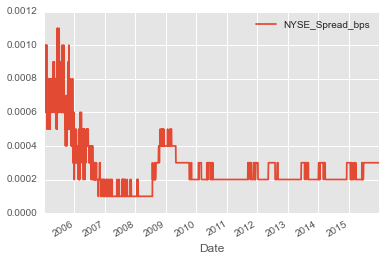

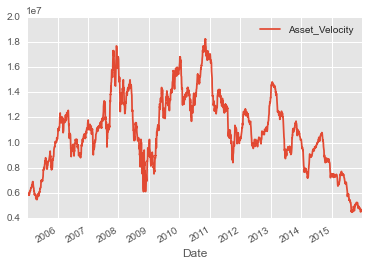

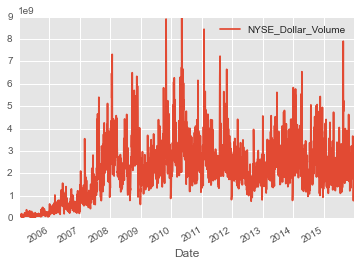

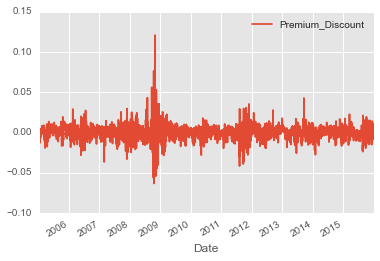

In [16]:
df[(df.Fund == 'EEM')].plot(x='Date', y='NYSE_Spread_bps')
df[(df.Fund == 'EEM')].plot(x='Date', y='Asset_Velocity')
df[(df.Fund == 'EEM')].plot(x='Date', y='NYSE_Dollar_Volume')
df[(df.Fund == 'EEM')].plot(x='Date', y='Premium_Discount')

### Variables for VWO Graphed

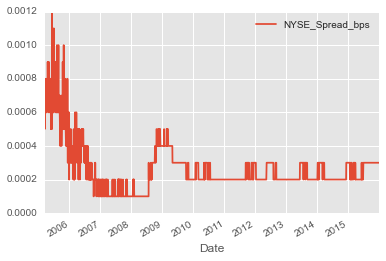

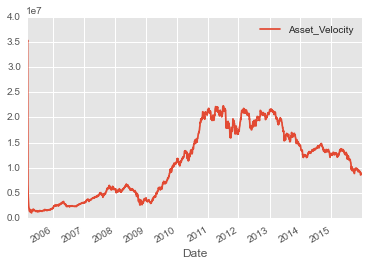

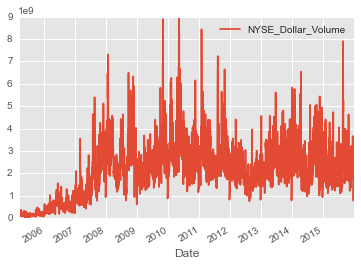

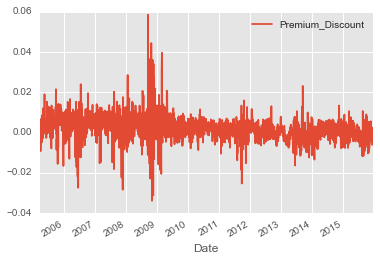

In [17]:
df[(df.Fund == 'VWO')].plot(x='Date', y='NYSE_Spread_bps')
df[(df.Fund == 'VWO')].plot(x='Date', y='Asset_Velocity')
df[(df.Fund == 'VWO')].plot(x='Date', y='NYSE_Dollar_Volume')
df[(df.Fund == 'VWO')].plot(x='Date', y='Premium_Discount')

### Variables for SCHE Graphed

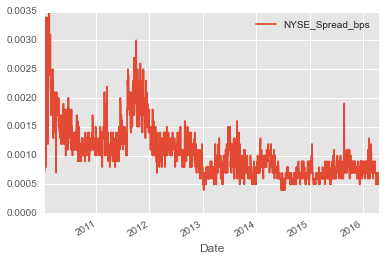

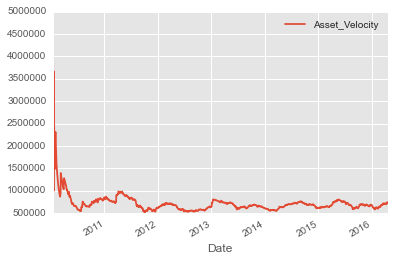

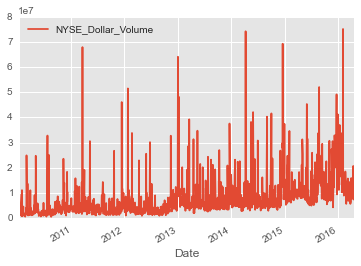

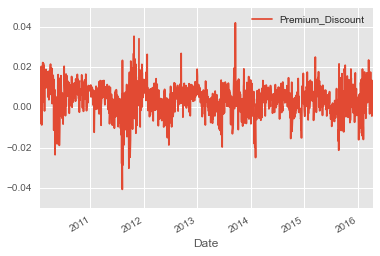

In [18]:
df[(df.Fund == 'SCHE')].plot(x='Date', y='NYSE_Spread_bps')
df[(df.Fund == 'SCHE')].plot(x='Date', y='Asset_Velocity')
df[(df.Fund == 'SCHE')].plot(x='Date', y='NYSE_Dollar_Volume')
df[(df.Fund == 'SCHE')].plot(x='Date', y='Premium_Discount')

### IEMG 

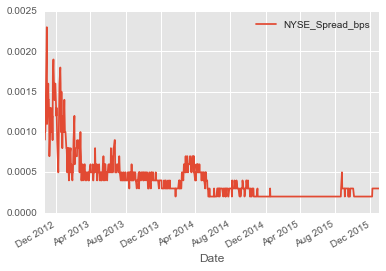

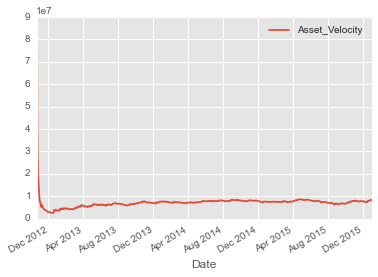

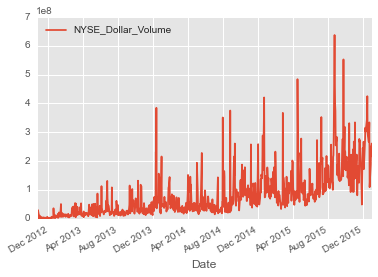

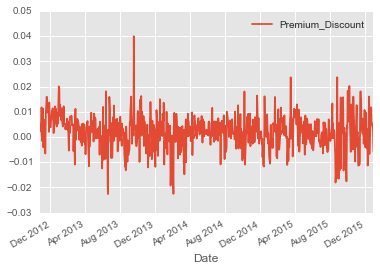

In [19]:
df[(df.Fund == 'IEMG')].plot(x='Date', y='NYSE_Spread_bps')
df[(df.Fund == 'IEMG')].plot(x='Date', y='Asset_Velocity')
df[(df.Fund == 'IEMG')].plot(x='Date', y='NYSE_Dollar_Volume')
df[(df.Fund == 'IEMG')].plot(x='Date', y='Premium_Discount')

### Transforming Data Continued

In [20]:
df = df.drop('Price_Change', 1)
df['Log_Asset_Velocity'] = np.log(df.Asset_Velocity)
df['Log_Dollar_Volume'] = np.log(df.Dollar_Volume)
df['Premium_Discount_Adj'] = df.Premium_Discount + 1
df['Log_Premium_Discount'] = np.log(df.Premium_Discount_Adj)
df['Log_NYSE_Spread_bps'] = np.log(df.NYSE_Spread_bps)
df['Log_Ask_Val'] = np.log(df.Ask_Val)
df['Log_Bid_Val'] = np.log(df.Bid_Val)


### Modeling

In [21]:
train_df = df.sample(frac = .6, random_state = 0).sort()
test_df = df.drop(train_df.index)

In [22]:
test_df.describe()


,Close_Price,High_Price,Low_Price,NAV,Premium_Discount,Volume,Dollar_Volume,Fund_Flow,Shares_Outstanding,NYSE_MKT_SHR,...,Vintage,AUM,Asset_Velocity,Log_Asset_Velocity,Log_Dollar_Volume,Premium_Discount_Adj,Log_Premium_Discount,Log_NYSE_Spread_bps,Log_Ask_Val,Log_Bid_Val
count,3140.000000,3140.000000,3140.000000,3140.000000,3139.000000,3.140000e+03,3.140000e+03,3.140000e+03,3140.000000,3140.000000,...,3140.000000,3.140000e+03,3140.000000,3140.000000,3140.000000,3139.000000,3139.000000,3140.000000,3140.000000,3140.000000
mean,37.033081,37.292646,36.746900,36.970704,0.001863,2.038324e+07,8.922380e+08,7.426000e+06,484273.360731,0.196880,...,1895.535669,1.956765e+10,8376874.841947,15.482740,18.881888,1.001863,0.001829,-8.022632,13.517988,13.252344
std,9.281830,9.320485,9.238967,9.281480,0.008014,3.015882e+07,1.186422e+09,1.309682e+08,441128.489845,0.141366,...,1233.978690,1.867523e+10,6072559.629018,1.158452,2.477780,0.008014,0.007984,0.735920,1.725677,1.975295
min,17.550000,17.650000,17.470000,17.466000,-0.063204,6.925000e+03,3.332938e+05,-1.173820e+09,200.001000,0.000000,...,1.000000,4.969205e+06,518295.868757,13.158302,12.716780,0.936796,-0.065289,-9.210340,9.854219,8.545151
25%,27.359175,27.537500,27.080000,27.155000,-0.001970,3.844120e+05,1.617138e+07,0.000000e+00,48825.000000,0.059250,...,853.750000,1.420926e+09,2781892.979902,14.838638,16.598752,0.998030,-0.001972,-8.517193,11.947658,11.598977
50%,39.415000,39.720000,39.145000,39.360000,0.002256,6.231885e+06,3.392640e+08,0.000000e+00,370350.030000,0.223000,...,1714.500000,1.209859e+10,7976314.485646,15.891987,19.642271,1.002256,0.002253,-8.111728,13.437833,12.949633
75%,43.870000,44.092500,43.572500,43.782275,0.006234,2.884000e+07,1.507736e+09,8.970000e+04,896400.000000,0.280000,...,2889.000000,3.699270e+10,12651301.295764,16.353271,21.133875,1.006234,0.006214,-7.418581,15.236634,15.232086
max,57.570000,57.625000,56.605000,56.980000,0.120749,2.486881e+08,8.434492e+09,1.517620e+09,1384514.130000,0.792000,...,4640.000000,6.174927e+10,82841000.000000,18.232434,22.855595,1.120749,0.113997,-5.809143,16.329822,16.369761


In [23]:
train_df.describe()

,Close_Price,High_Price,Low_Price,NAV,Premium_Discount,Volume,Dollar_Volume,Fund_Flow,Shares_Outstanding,NYSE_MKT_SHR,...,Vintage,AUM,Asset_Velocity,Log_Asset_Velocity,Log_Dollar_Volume,Premium_Discount_Adj,Log_Premium_Discount,Log_NYSE_Spread_bps,Log_Ask_Val,Log_Bid_Val
count,4710.000000,4710.000000,4710.000000,4710.000000,4707.000000,4.710000e+03,4.710000e+03,4.710000e+03,4710.000000,4710.000000,...,4710.000000,4.710000e+03,4710.000000,4710.000000,4710.000000,4707.000000,4707.000000,4710.000000,4710.000000,4710.000000
mean,36.948725,37.205877,36.655254,36.887454,0.001830,2.055432e+07,8.880630e+08,1.046097e+07,495946.686268,0.196653,...,1905.111253,1.999196e+10,8508340.239635,15.498868,18.917767,1.001830,0.001799,-8.025291,13.536181,13.293593
std,9.233153,9.267620,9.187537,9.230792,0.007601,2.948747e+07,1.162822e+09,1.273892e+08,445560.170611,0.143399,...,1225.570888,1.885486e+10,6095042.991265,1.160419,2.456479,0.007601,0.007590,0.731492,1.740836,1.975559
min,17.110000,17.220000,16.772000,16.903100,-0.056009,1.150000e+04,4.922748e+05,-1.881830e+09,200.001000,0.000000,...,1.000000,4.950645e+06,512777.358576,13.147597,13.106792,0.943991,-0.057639,-9.210340,9.144441,8.094330
25%,27.386725,27.562500,27.237525,27.257825,-0.002005,4.032072e+05,1.599640e+07,0.000000e+00,49900.000000,0.034500,...,881.250000,1.411109e+09,2777296.222114,14.836988,16.587873,0.997995,-0.002007,-8.517193,11.961868,11.682133
50%,39.305000,39.565000,38.985200,39.305000,0.002107,6.786540e+06,3.558645e+08,0.000000e+00,382049.970000,0.224000,...,1738.000000,1.348228e+10,8218345.690106,15.921879,19.690060,1.002107,0.002105,-8.111728,13.529103,13.034802
75%,43.680000,43.876725,43.370000,43.590000,0.005888,3.067508e+07,1.517086e+09,9.440000e+04,907425.000000,0.283000,...,2860.750000,3.759987e+10,12756338.110463,16.361539,21.140057,1.005888,0.005870,-7.418581,15.247247,15.266551
max,58.640000,58.925000,57.500000,58.310000,0.076386,2.250631e+08,8.633872e+09,1.603340e+09,1384512.250000,0.915000,...,4647.000000,6.223221e+10,82059000.000000,18.222949,22.878959,1.076386,0.073609,-5.654992,16.329822,16.354709


In [24]:
df.columns

Index([u'Fund', u'Date', u'Close_Price', u'High_Price', u'Low_Price', u'NAV',
       u'Premium_Discount', u'Volume', u'Dollar_Volume', u'Fund_Flow',
       u'Shares_Outstanding', u'Inception', u'NYSE_MKT_SHR', u'NYSE_VOLUME',
       u'NYSE_Dollar_Volume', u'NYSE_Intraday_Volatility',
       u'NYSE_Daily_Volatility', u'NYSE_Close', u'NYSE_VWAP', u'NYSE_Range',
       u'NYSE_pct_range', u'NYSE_Spread', u'NYSE_Spread_bps', u'NYSE_Bid_Size',
       u'NYSE_Ask_Size', u'NYSE_Average_Size', u'Ask_Val', u'Bid_Val',
       u'Vintage', u'AUM', u'Asset_Velocity', u'Log_Asset_Velocity',
       u'Log_Dollar_Volume', u'Premium_Discount_Adj', u'Log_Premium_Discount',
       u'Log_NYSE_Spread_bps', u'Log_Ask_Val', u'Log_Bid_Val'],
      dtype='object')

In [56]:
model_6 = smf.ols(formula = 'Log_Asset_Velocity ~ 0 + Log_Ask_Val + Log_Bid_Val + Log_Dollar_Volume + Log_NYSE_Spread_bps + Premium_Discount_Adj', data = train_df)
model_6 = model_6.fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Log_Asset_Velocity   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.540e+05
Date:                Sun, 01 May 2016   Prob (F-statistic):               0.00
Time:                        14:51:21   Log-Likelihood:                -3559.9
No. Observations:                4707   AIC:                             7130.
Df Residuals:                    4702   BIC:                             7162.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Log_Ask_Val              0.1122      0.014      7.832      0.000         0.084     0.140
Log_Bid_Val              0.0302      0.014      2.169      0.030         0.003     0.058
Log_Dollar_Volume        0.2181      0.006     36.693      0.000         0.206     0.230
Log_NYSE_Spread_bps     -0.5272      0.015    -35.413      0.000        -0.556    -0.498
Premium_Discount_Adj     5.2114      0.093     55.755      0.000         5.028     5.395
==============================================================================
Omnibus:                      487.197   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1357.188
Skew:                           0.568   Prob(JB):                    1.95e-295
Kurtosis:                       5.372   Cond. No.                         354.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
smf.ols(formula = 'Log_Asset_Velocity ~ 0 + Log_Ask_Val + Log_Dollar_Volume + Log_NYSE_Spread_bps + Premium_Discount_Adj', data = train_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Log_Asset_Velocity   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.067e+06
Date:                Tue, 03 May 2016   Prob (F-statistic):               0.00
Time:                        14:24:34   Log-Likelihood:                -3562.3
No. Observations:                4707   AIC:                             7133.
Df Residuals:                    4703   BIC:                             7158.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Log_Ask_Val              0.1398      0.007     21.387      0.000         0.127     0.153
Log_Dollar_Volume        0.2219      0.006     39.018      0.000         0.211     0.233
Log_NYSE_Spread_bps     -0.5319      0.015    -36.102      0.000        -0.561    -0.503
Premium_Discount_Adj     5.1300      0.086     59.911      0.000         4.962     5.298
==============================================================================
Omnibus:                      490.333   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1408.367
Skew:                           0.563   Prob(JB):                    1.50e-306
Kurtosis:                       5.432   Cond. No.                         284.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Log_Asset Velocity = .1122 * Log_Ask_Val + .0302 * Log_Bid_Val + .2181 * Log_Dollar_Volume + -.5272 * Log_NYSE_Spread_Bps + 5.2114 * Premium_Discount_Adj

In [54]:
df_EEM.Premium_Discount.describe()

count    2761.000000
mean        0.000354
std         0.009274
min        -0.063204
25%        -0.004320
50%         0.001030
75%         0.005242
max         0.120749
Name: Premium_Discount, dtype: float64

In [58]:
smf.ols(formula = 'Log_Asset_Velocity ~ 0 + Log_Ask_Val + Log_Bid_Val + Log_Dollar_Volume + Log_NYSE_Spread_bps + Premium_Discount_Adj', data = test_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Log_Asset_Velocity   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.337e+05
Date:                Tue, 03 May 2016   Prob (F-statistic):               0.00
Time:                        14:24:12   Log-Likelihood:                -2471.7
No. Observations:                3139   AIC:                             4953.
Df Residuals:                    3134   BIC:                             4984.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Log_Ask_Val              0.1431      0.018      7.833      0.000         0.107     0.179
Log_Bid_Val              0.0068      0.018      0.388      0.698        -0.028     0.041
Log_Dollar_Volume        0.2169      0.007     29.681      0.000         0.203     0.231
Log_NYSE_Spread_bps     -0.5097      0.019    -27.501      0.000        -0.546    -0.473
Premium_Discount_Adj     5.2617      0.119     44.056      0.000         5.028     5.496
==============================================================================
Omnibus:                      485.957   Durbin-Watson:                   0.181
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1846.150
Skew:                           0.731   Prob(JB):                         0.00
Kurtosis:                       6.461   Cond. No.                         358.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Data Frame Per Fund 

In [26]:
df_EEM = df[df.Fund == "EEM"]
df_VWO = df[df.Fund == "VWO"]
df_IEMG = df[df.Fund == "IEMG"]
df_SCHE = df[df.Fund == "SCHE"]


In [27]:
pd.rolling_mean

<function pandas.algos.roll_mean>

In [28]:
df.columns

Index([u'Fund', u'Date', u'Close_Price', u'High_Price', u'Low_Price', u'NAV',
       u'Premium_Discount', u'Volume', u'Dollar_Volume', u'Fund_Flow',
       u'Shares_Outstanding', u'Inception', u'NYSE_MKT_SHR', u'NYSE_VOLUME',
       u'NYSE_Dollar_Volume', u'NYSE_Intraday_Volatility',
       u'NYSE_Daily_Volatility', u'NYSE_Close', u'NYSE_VWAP', u'NYSE_Range',
       u'NYSE_pct_range', u'NYSE_Spread', u'NYSE_Spread_bps', u'NYSE_Bid_Size',
       u'NYSE_Ask_Size', u'NYSE_Average_Size', u'Ask_Val', u'Bid_Val',
       u'Vintage', u'AUM', u'Asset_Velocity', u'Log_Asset_Velocity',
       u'Log_Dollar_Volume', u'Premium_Discount_Adj', u'Log_Premium_Discount',
       u'Log_NYSE_Spread_bps', u'Log_Ask_Val', u'Log_Bid_Val'],
      dtype='object')

In [28]:
df.set_index('Date', inplace = True)
df['Year'] = df.index.year
df['Month'] = df.index.month

In [30]:
df.columns

Index([u'Fund', u'Close_Price', u'High_Price', u'Low_Price', u'NAV',
       u'Premium_Discount', u'Volume', u'Dollar_Volume', u'Fund_Flow',
       u'Shares_Outstanding', u'Inception', u'NYSE_MKT_SHR', u'NYSE_VOLUME',
       u'NYSE_Dollar_Volume', u'NYSE_Intraday_Volatility',
       u'NYSE_Daily_Volatility', u'NYSE_Close', u'NYSE_VWAP', u'NYSE_Range',
       u'NYSE_pct_range', u'NYSE_Spread', u'NYSE_Spread_bps', u'NYSE_Bid_Size',
       u'NYSE_Ask_Size', u'NYSE_Average_Size', u'Ask_Val', u'Bid_Val',
       u'Vintage', u'AUM', u'Asset_Velocity', u'Log_Asset_Velocity',
       u'Log_Dollar_Volume', u'Premium_Discount_Adj', u'Log_Premium_Discount',
       u'Log_NYSE_Spread_bps', u'Log_Ask_Val', u'Log_Bid_Val', u'Year',
       u'Month'],
      dtype='object')

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

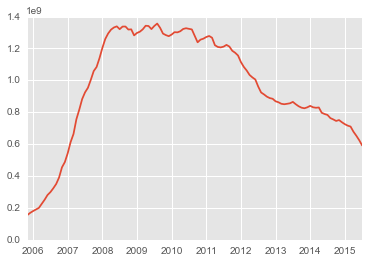

In [31]:
pd.rolling_mean(df.Dollar_Volume, window = 20, center = True, freq = 'M').plot()